# Working With Time Series Data in Pandas Exercises

#### For all of the datasets below:
    - examine the data types of each column
    - ensure that the dates are in the proper forma
    - set the dataframe's index to the date column as appropriate.

In [1]:
import pandas as pd

from vega_datasets import data
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


#### Use the sf_temps dataset for the exercises below:
1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [2]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
df = df.set_index('date').sort_index()
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [5]:
by_day = df.asfreq('D')
by_day.head(10)

,temp
date,
2010-01-01,47.8
2010-01-02,47.9
2010-01-03,48.0
2010-01-04,48.1
2010-01-05,48.0
2010-01-06,48.1
2010-01-07,48.1
2010-01-08,48.0
2010-01-09,48.0


In [6]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:xlabel='date'>

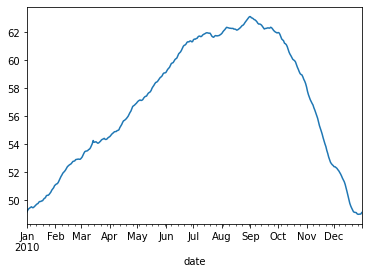

In [7]:
df.resample('D').mean().temp.plot()

2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

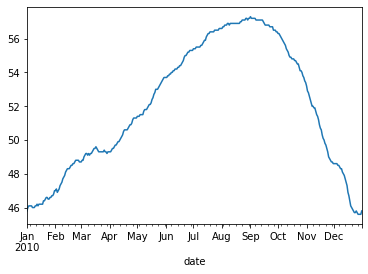

In [8]:
df.resample('D').min().temp.plot()

3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

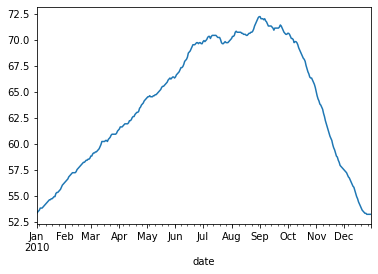

In [9]:
df.resample('D').max().temp.plot()

4. Which month is the coldest, on average?

In [10]:
df['month'] = df.index.month_name()
df.head()

,temp,month
date,,
2010-01-01 00:00:00,47.8,January
2010-01-01 01:00:00,47.4,January
2010-01-01 02:00:00,46.9,January
2010-01-01 03:00:00,46.5,January
2010-01-01 04:00:00,46.0,January


In [11]:
#df = df.set_index('month')
df.head()

,temp,month
date,,
2010-01-01 00:00:00,47.8,January
2010-01-01 01:00:00,47.4,January
2010-01-01 02:00:00,46.9,January
2010-01-01 03:00:00,46.5,January
2010-01-01 04:00:00,46.0,January


In [12]:
lowest_avg_temp = df.resample('M').temp.mean().min()
lowest_avg_temp

49.984139784946244

In [13]:
df['avg_monthly_temp'] = df.resample('M').temp.transform('mean')
df.avg_monthly_temp.min()

49.984139784946244

In [14]:
df.head()

,temp,month,avg_monthly_temp
date,,,
2010-01-01 00:00:00,47.8,January,49.98414
2010-01-01 01:00:00,47.4,January,49.98414
2010-01-01 02:00:00,46.9,January,49.98414
2010-01-01 03:00:00,46.5,January,49.98414
2010-01-01 04:00:00,46.0,January,49.98414


In [15]:
coldest_month = df['month'][df['avg_monthly_temp'] == lowest_avg_temp]
coldest_month[1]

'January'

5. Which month has the highest average temperature?

In [16]:
highest_avg_temp = df.resample('M').temp.mean().max()
highest_avg_temp

62.48708333333335

In [17]:
hottest_month = df['month'][df['avg_monthly_temp'] == highest_avg_temp]
hottest_month[1]

'September'

In [18]:
#df['month'] = pd.DatetimeIndex(df['birth_date']).month

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [19]:
df['max_day_temp'] = df.resample('D').temp.transform('max')
df['min_day_temp'] = df.resample('D').temp.transform('min')
df

,temp,month,avg_monthly_temp,max_day_temp,min_day_temp
date,,,,,
2010-01-01 00:00:00,47.8,January,49.984140,53.3,45.8
2010-01-01 01:00:00,47.4,January,49.984140,53.3,45.8
2010-01-01 02:00:00,46.9,January,49.984140,53.3,45.8
2010-01-01 03:00:00,46.5,January,49.984140,53.3,45.8
2010-01-01 04:00:00,46.0,January,49.984140,53.3,45.8
...,...,...,...,...,...
2010-12-31 19:00:00,50.4,December,50.498253,53.2,45.8
2010-12-31 20:00:00,49.9,December,50.498253,53.2,45.8
2010-12-31 21:00:00,49.4,December,50.498253,53.2,45.8


In [20]:
df['temp_delta_per_day'] = df['max_day_temp'] - df['min_day_temp']
df.head()

,temp,month,avg_monthly_temp,max_day_temp,min_day_temp,temp_delta_per_day
date,,,,,,
2010-01-01 00:00:00,47.8,January,49.98414,53.3,45.8,7.5
2010-01-01 01:00:00,47.4,January,49.98414,53.3,45.8,7.5
2010-01-01 02:00:00,46.9,January,49.98414,53.3,45.8,7.5
2010-01-01 03:00:00,46.5,January,49.98414,53.3,45.8,7.5
2010-01-01 04:00:00,46.0,January,49.98414,53.3,45.8,7.5


In [21]:
df['month'][df.temp_delta_per_day == df.temp_delta_per_day.max()][1]

'August'

In [22]:
df.loc[df.temp_delta_per_day == df.temp_delta_per_day.max()]

,temp,month,avg_monthly_temp,max_day_temp,min_day_temp,temp_delta_per_day
date,,,,,,
2010-08-31 00:00:00,58.8,August,62.405376,72.2,57.2,15.0
2010-08-31 01:00:00,58.5,August,62.405376,72.2,57.2,15.0
2010-08-31 02:00:00,58.0,August,62.405376,72.2,57.2,15.0
2010-08-31 03:00:00,57.6,August,62.405376,72.2,57.2,15.0
2010-08-31 04:00:00,57.4,August,62.405376,72.2,57.2,15.0
2010-08-31 05:00:00,57.2,August,62.405376,72.2,57.2,15.0
2010-08-31 06:00:00,57.4,August,62.405376,72.2,57.2,15.0
2010-08-31 07:00:00,59.3,August,62.405376,72.2,57.2,15.0
2010-08-31 08:00:00,62.1,August,62.405376,72.2,57.2,15.0


7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

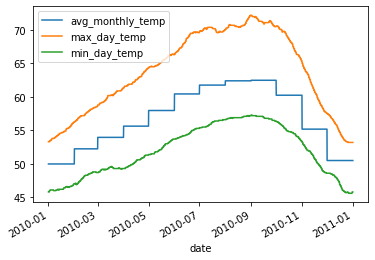

In [23]:
df_plot = pd.DataFrame(df, columns=['avg_monthly_temp','max_day_temp', 'min_day_temp'])

df_plot.plot(legend=True);

<AxesSubplot:xlabel='date'>

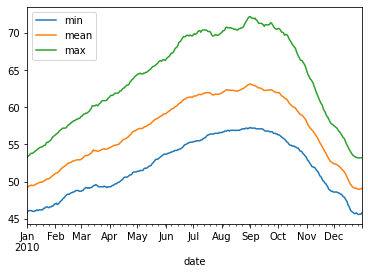

In [24]:
df.temp.resample('D').agg(['min', 'mean', 'max']).plot()

## Use the data.seattle_weather() dataset to answer the following questions:

1. Which year and month combination has the highest amount of precipitation?

In [25]:
from vega_datasets import data
df_wthr = data.seattle_weather()

In [26]:
df_wthr.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [27]:
df_wthr.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [28]:
df_wthr['yr'] = df_wthr.date.dt.year
df_wthr['month'] = df_wthr.date.dt.month
df_wthr['yr_month'] = df_wthr['date'].dt.to_period('M')
df_wthr.head()

,date,precipitation,temp_max,temp_min,wind,weather,yr,month,yr_month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,2012-01
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2012-01
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,2012-01
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,2012-01
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,2012-01


In [29]:
df_wthr = df_wthr.set_index('date').sort_index()

In [30]:
# Which year and month combination has the highest amount of precipitation?

df_wthr.resample('M').sum().precipitation.sort_values().tail(5)

date
2012-03-31    183.0
2012-11-30    210.5
2015-11-30    212.6
2014-03-31    240.0
2015-12-31    284.5
Name: precipitation, dtype: float64

2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

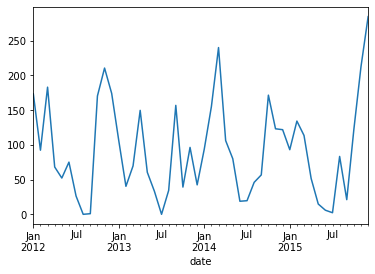

In [31]:
df_wthr.precipitation.resample('M').sum().plot()

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

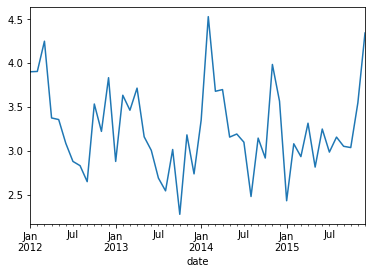

In [32]:
df_wthr.wind.resample('M').mean().plot()

4. Which year-month combination is the windiest?

In [33]:
df_wthr.resample('M').mean().wind.sort_values().tail(5)

date
2012-02-29    3.903448
2014-11-30    3.983333
2012-03-31    4.248387
2015-12-31    4.341935
2014-02-28    4.528571
Name: wind, dtype: float64

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [34]:
df_wthr.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [35]:
df_wthr['sunny'] = df_wthr.weather == 'sun'
df_wthr.head()

,precipitation,temp_max,temp_min,wind,weather,yr,month,yr_month,sunny
date,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,2012-01,False
2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2012-01,False
2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,2012-01,False
2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,2012-01,False
2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,2012-01,False


In [36]:
df_wthr.resample('Y').sunny.mean()

date
2012-12-31    0.322404
2013-12-31    0.561644
2014-12-31    0.578082
2015-12-31    0.493151
Freq: A-DEC, Name: sunny, dtype: float64

In [37]:
df_wthr.groupby('weather').resample('Y').size()

weather  date      
drizzle  2012-12-31     31
         2013-12-31     16
         2014-12-31      0
         2015-12-31      7
fog      2012-12-31      5
         2013-12-31     82
         2014-12-31    151
         2015-12-31    173
rain     2012-12-31    191
         2013-12-31     60
         2014-12-31      3
         2015-12-31      5
snow     2012-12-31     21
         2013-12-31      2
sun      2012-12-31    118
         2013-12-31    205
         2014-12-31    211
         2015-12-31    180
dtype: int64

In [38]:
#2014-12

6. In which month does it rain the most?

In [39]:
df_wthr['month'] = df_wthr.index.month
df_wthr.head()

,precipitation,temp_max,temp_min,wind,weather,yr,month,yr_month,sunny
date,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,2012-01,False
2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2012-01,False
2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,2012-01,False
2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,2012-01,False
2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,2012-01,False


In [40]:
df_wthr.groupby('month').precipitation.sum().sort_values()

month
7      48.2
6     132.9
8     163.7
5     207.5
9     235.5
4     375.4
2     422.0
1     466.0
10    503.4
3     606.2
12    622.7
11    642.5
Name: precipitation, dtype: float64

7. Which month has the most number of days with a non-zero amount of precipitation?

In [41]:
df_wthr['no_rain'] =  df_wthr.precipitation > 0
df_wthr.head()

,precipitation,temp_max,temp_min,wind,weather,yr,month,yr_month,sunny,no_rain
date,,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,2012-01,False,False
2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2012-01,False,True
2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,2012-01,False,True
2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,2012-01,False,True
2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,2012-01,False,True


In [43]:
df_wthr.groupby('month').no_rain.sum().sort_values()

month
7     11
8     22
5     34
9     35
6     37
4     59
10    61
1     66
11    71
2     73
3     73
12    81
Name: no_rain, dtype: int64

### Use data set  data.flights_20k()
1. Convert any negative delays to 0.

In [55]:
import vega_datasets

import matplotlib.pyplot as plt
import numpy as np

df_flt = data.flights_20k()

In [56]:
df = vega_datasets.data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [57]:
df.delay = np.where(df.delay < 0, 0, df.delay)

2. Which hour of the day has the highest average delay?

In [58]:
df.groupby(df.date.dt.hour).delay.mean().sort_values().tail(3)

date
0    127.916667
1    170.000000
3    302.500000
Name: delay, dtype: float64

3. Does the day of the week make a difference in the delay amount?

In [59]:
df.groupby(df.date.dt.day_name()).delay.mean().sort_values()

date
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

4. Does the month make a difference in the delay amount?

In [60]:
df.groupby(df.date.dt.month).delay.mean().sort_values()

date
3     9.875287
1    11.301592
2    12.306106
Name: delay, dtype: float64